Python code shows the output of the training dataset.

**For test dataset you just need to replace ID with your file ID and name of the file with test dataset.**



*   Deep learning model is used to train the data.
*   SMOTE is used to tackle the problem of imbalanced class



In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

downloaded = drive.CreateFile({'id':''}) # replace the id with id of file you want to access
downloaded.GetContentFile('Train_data.csv') # mention the test dataset file name here

In [ ]:
import pandas as pd
df = pd.read_csv('Train_data.csv') # mention the test dataset file name here
df.shape

(246013, 22)

The upper output shows the no. of rows: 246013 and no. of columns : 22 

In [ ]:
#Column Names

df.columns

Index(['CUSTOMER_ID', 'TARGET', 'TYPE_OF_LOAN', 'GENDER_APPLICANT', 'INCOME',
       'LOAN_AMOUNT', 'PRICE_HOUSE', 'INCOME_TYPE', 'EDUCATION_TYPE', 'AGE',
       'EMPLOYED_DURATION', 'DAYS_ID', 'AGENCY_1', 'AGENCY_2', 'AGENCY_3',
       'OWN_CAR', 'OWN_REALTY', 'NUMBER_CHILDREN', 'NAME_FAMILY_STATUS',
       'AGE_CAR', 'MOBILE', 'Permanent_Contact_Address'],
      dtype='object')

In [ ]:
df.head(5)
# below ouput shows the top five rows of the dataset with all the columns 

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,AGE_CAR,MOBILE,Permanent_Contact_Address
0,171236,0,Cash loans,F,400500.0,1093068.0,783000.0,Working,Secondary / secondary special,-13198,-2179,-3928,0.459556,0.612768,0.511892,N,Y,1,Married,NaN,1,0
1,171238,0,Cash loans,F,315000.0,1256400.0,900000.0,Working,Academic degree,-19715,-1601,-3165,0.622698,0.606184,0.126101,N,Y,0,Separated,NaN,1,0
2,171239,0,Cash loans,F,225000.0,485640.0,450000.0,Commercial associate,Secondary / secondary special,-10967,-475,-748,0.445464,0.435305,0.380800,Y,Y,1,Married,16.0,1,0
3,171240,0,Cash loans,F,157500.0,153576.0,121500.0,Working,Secondary / secondary special,-12130,-1019,-4741,0.169173,0.572134,0.379100,N,Y,1,Single / not married,NaN,1,0
4,171243,0,Cash loans,F,256500.0,1090926.0,1003500.0,Working,Secondary / secondary special,-11226,-858,-1199,NaN,0.289694,NaN,Y,Y,1,Married,8.0,1,0


In [ ]:
#Recode Target Variable
#0 = cash loan
#1 = revolving loan
df['TYPE_OF_LOAN'].replace("Cash loans", 0,inplace=True)
df['TYPE_OF_LOAN'].replace("Revolving loans", 1,inplace=True)

# here we denoted the two different type of loans i.e. cash loans as "0" and the Revolving loans as "1"


In [ ]:

# There were different categories among Income type, education type, family status, own car, own realty and gender applicant.
# So, with the help of Label encoder we visualize them into integer variables i.e. 0, 1,2, 3....

# Income type      0: Businessman, 1:Commercial associate,2:Maternity leave,3:Pensioner, 4:State servant, 5:student , 6:unemployed , 7:Working
# Education type   0: Academic degree, 1:Higher education,2:Incomplete higher,3:Lower secondary, 4: secondary/ secondary special
# family status    0: Civil marriage, 1: Married,2:separated,3:single/ not married, 4:unknown, 5:widow 
# own car          0: ( N0), 1 : (yes)
# own realty       0: ( N0), 1 : (yes)
# gender applicant 0: (F), 1: (M)


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['INCOME_TYPE','EDUCATION_TYPE','NAME_FAMILY_STATUS','OWN_CAR', 'OWN_REALTY', 'GENDER_APPLICANT']] = df.loc[:,['INCOME_TYPE','EDUCATION_TYPE','NAME_FAMILY_STATUS','OWN_CAR', 'OWN_REALTY', 'GENDER_APPLICANT']].apply(enc.fit_transform)

In [ ]:
df.head(4)

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,AGE_CAR,MOBILE,Permanent_Contact_Address
0,171236,0,0,0,400500.0,1093068.0,783000.0,7,4,-13198,-2179,-3928,0.459556,0.612768,0.511892,0,1,1,1,NaN,1,0
1,171238,0,0,0,315000.0,1256400.0,900000.0,7,0,-19715,-1601,-3165,0.622698,0.606184,0.126101,0,1,0,2,NaN,1,0
2,171239,0,0,0,225000.0,485640.0,450000.0,1,4,-10967,-475,-748,0.445464,0.435305,0.380800,1,1,1,1,16.0,1,0
3,171240,0,0,0,157500.0,153576.0,121500.0,7,4,-12130,-1019,-4741,0.169173,0.572134,0.379100,0,1,1,3,NaN,1,0


In [ ]:
df.isnull().values.any()
#We try to find if there exist any null values or not in the given dataset

True

True ouput shows there exist NULL values

In [ ]:
df.drop('AGE_CAR', inplace=True, axis=1)
# We observe that  Variable : AGE of car have very large no. of null values, about 162338 out of 246013 records, and hence we decided to drop this variable

In [ ]:
df.head()

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,MOBILE,Permanent_Contact_Address
0,171236,0,0,0,400500.0,1093068.0,783000.0,7,4,-13198,-2179,-3928,0.459556,0.612768,0.511892,0,1,1,1,1,0
1,171238,0,0,0,315000.0,1256400.0,900000.0,7,0,-19715,-1601,-3165,0.622698,0.606184,0.126101,0,1,0,2,1,0
2,171239,0,0,0,225000.0,485640.0,450000.0,1,4,-10967,-475,-748,0.445464,0.435305,0.380800,1,1,1,1,1,0
3,171240,0,0,0,157500.0,153576.0,121500.0,7,4,-12130,-1019,-4741,0.169173,0.572134,0.379100,0,1,1,3,1,0
4,171243,0,0,0,256500.0,1090926.0,1003500.0,7,4,-11226,-858,-1199,NaN,0.289694,NaN,1,1,1,1,1,0


Further to fill the ***missing values*** in the variables : credit score by different agencies, we used ***interpolate function*** as described below

In [ ]:
# NULL values present in the variables: Agency 1 , Agency 2 and Agency 3
# Agency 1 , null values: 138659    Agency 2 , null values: 514     Agency 3 , null values: 48771

# We can observe that the above null values for the agency variables can't be neglected as removing those values will leave us with very less no. of rows. 
# As we require sufficient data for model, we try to interpolate those missing values.

df['AGENCY_1'].interpolate(method='linear', direction = 'forward', inplace=True)

In [ ]:
df['AGENCY_2'].interpolate(method='linear', direction = 'forward', inplace=True)

In [ ]:
df['AGENCY_3'].interpolate(method='linear', direction = 'forward', inplace=True)

In [ ]:
df.head()

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,MOBILE,Permanent_Contact_Address
0,171236,0,0,0,400500.0,1093068.0,783000.0,7,4,-13198,-2179,-3928,0.459556,0.612768,0.511892,0,1,1,1,1,0
1,171238,0,0,0,315000.0,1256400.0,900000.0,7,0,-19715,-1601,-3165,0.622698,0.606184,0.126101,0,1,0,2,1,0
2,171239,0,0,0,225000.0,485640.0,450000.0,1,4,-10967,-475,-748,0.445464,0.435305,0.380800,1,1,1,1,1,0
3,171240,0,0,0,157500.0,153576.0,121500.0,7,4,-12130,-1019,-4741,0.169173,0.572134,0.379100,0,1,1,3,1,0
4,171243,0,0,0,256500.0,1090926.0,1003500.0,7,4,-11226,-858,-1199,0.522718,0.289694,0.595962,1,1,1,1,1,0


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.shape

(246013, 21)

In [ ]:
# drop all rows with NaN values
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(245784, 21)

In [ ]:
df.isnull().values.any()

False

Now we have no null values and data can be fully utilized further.

In [ ]:
df.head()

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,MOBILE,Permanent_Contact_Address
0,171236,0,0,0,400500.0,1093068.0,783000.0,7,4,-13198,-2179,-3928,0.459556,0.612768,0.511892,0,1,1,1,1,0
1,171238,0,0,0,315000.0,1256400.0,900000.0,7,0,-19715,-1601,-3165,0.622698,0.606184,0.126101,0,1,0,2,1,0
2,171239,0,0,0,225000.0,485640.0,450000.0,1,4,-10967,-475,-748,0.445464,0.435305,0.380800,1,1,1,1,1,0
3,171240,0,0,0,157500.0,153576.0,121500.0,7,4,-12130,-1019,-4741,0.169173,0.572134,0.379100,0,1,1,3,1,0
4,171243,0,0,0,256500.0,1090926.0,1003500.0,7,4,-11226,-858,-1199,0.522718,0.289694,0.595962,1,1,1,1,1,0


In [ ]:
df['AGE'] = -df['AGE']/365
df['EMPLOYED_DURATION'] = -df['EMPLOYED_DURATION']/365

# As to calculate the age of  applicant and the duartion for which individual is employed, we count them and divide them by 365 to get the required no. in years


In [ ]:
df.head()

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,MOBILE,Permanent_Contact_Address
0,171236,0,0,0,400500.0,1093068.0,783000.0,7,4,36.158904,5.969863,-3928,0.459556,0.612768,0.511892,0,1,1,1,1,0
1,171238,0,0,0,315000.0,1256400.0,900000.0,7,0,54.013699,4.386301,-3165,0.622698,0.606184,0.126101,0,1,0,2,1,0
2,171239,0,0,0,225000.0,485640.0,450000.0,1,4,30.046575,1.301370,-748,0.445464,0.435305,0.380800,1,1,1,1,1,0
3,171240,0,0,0,157500.0,153576.0,121500.0,7,4,33.232877,2.791781,-4741,0.169173,0.572134,0.379100,0,1,1,3,1,0
4,171243,0,0,0,256500.0,1090926.0,1003500.0,7,4,30.756164,2.350685,-1199,0.522718,0.289694,0.595962,1,1,1,1,1,0


In [ ]:
df.describe()
# This gives the descriptive statistics of dataset

,CUSTOMER_ID,TARGET,TYPE_OF_LOAN,GENDER_APPLICANT,INCOME,LOAN_AMOUNT,PRICE_HOUSE,INCOME_TYPE,EDUCATION_TYPE,AGE,EMPLOYED_DURATION,DAYS_ID,AGENCY_1,AGENCY_2,AGENCY_3,OWN_CAR,OWN_REALTY,NUMBER_CHILDREN,NAME_FAMILY_STATUS,MOBILE,Permanent_Contact_Address
count,245784.000000,245784.000000,245784.000000,245784.000000,2.457840e+05,2.457840e+05,2.457840e+05,245784.000000,245784.000000,245784.000000,245784.000000,245784.000000,245784.000000,245784.000000,245784.000000,245784.000000,245784.00000,245784.000000,245784.000000,245784.0,245784.000000
mean,313796.835180,0.080595,0.094437,0.341369,1.685303e+05,5.991229e+05,5.382169e+05,4.666882,3.187705,43.950629,-175.455308,-2994.604148,0.502720,0.514483,0.510956,0.340453,0.69343,0.416219,1.473269,1.0,0.015131
std,82189.323862,0.272213,0.292436,0.474187,1.113147e+05,4.023554e+05,3.692242e+05,2.544573,1.298810,11.957861,387.561679,1508.982386,0.183688,0.190928,0.185519,0.473863,0.46107,0.721301,1.169353,0.0,0.122075
min,171236.000000,0.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,4.050000e+04,0.000000,0.000000,20.517808,-1000.665753,-7197.000000,0.014691,0.000001,0.000527,0.000000,0.00000,0.000000,0.000000,1.0,0.000000
25%,242607.750000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,3.000000,2.000000,34.032877,0.789041,-4300.000000,0.365603,0.392838,0.382502,0.000000,0.00000,0.000000,1.000000,1.0,0.000000
50%,313844.500000,0.000000,0.000000,0.000000,1.485000e+05,5.146020e+05,4.500000e+05,7.000000,4.000000,43.161644,3.320548,-3254.000000,0.505735,0.565838,0.531686,0.000000,1.00000,0.000000,1.000000,1.0,0.000000
75%,384681.250000,0.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,7.000000,4.000000,53.947945,7.542466,-1721.000000,0.642470,0.663529,0.656158,1.000000,1.00000,1.000000,2.000000,1.0,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.800009e+07,4.050000e+06,4.050000e+06,7.000000,4.000000,69.120548,49.073973,0.000000,0.962693,0.855000,0.893976,1.000000,1.00000,19.000000,5.000000,1.0,1.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245784 entries, 0 to 246012
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CUSTOMER_ID                245784 non-null  int64  
 1   TARGET                     245784 non-null  int64  
 2   TYPE_OF_LOAN               245784 non-null  int64  
 3   GENDER_APPLICANT           245784 non-null  int64  
 4   INCOME                     245784 non-null  float64
 5   LOAN_AMOUNT                245784 non-null  float64
 6   PRICE_HOUSE                245784 non-null  float64
 7   INCOME_TYPE                245784 non-null  int64  
 8   EDUCATION_TYPE             245784 non-null  int64  
 9   AGE                        245784 non-null  float64
 10  EMPLOYED_DURATION          245784 non-null  float64
 11  DAYS_ID                    245784 non-null  int64  
 12  AGENCY_1                   245784 non-null  float64
 13  AGENCY_2                   24

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


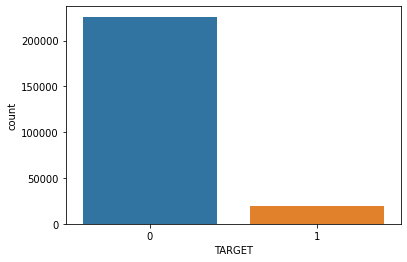

In [ ]:
#Visualisatiomn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['TARGET'],label="Count")
plt.show()

 We can observe that the data class is highly imbalanced
 1:  defaulted
 0:  Not defaulted

In [ ]:
target_column = ['TARGET'] 
predictors = list(set(list(df.columns))-set(target_column))

In [ ]:
X = df[predictors].values
y = df[target_column].values

In [ ]:
# Split the data into train and test data with a test size ratio of 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(172048, 20)
(73736, 20)


In [ ]:
# As the class was highly imbalanced, we apply SMOTE 


from imblearn.over_sampling import SMOTE
smote = SMOTE()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((172048, 20), (172048, 1), (73736, 20), (73736, 1))

In [ ]:
X_train_smote.shape,y_train_smote.shape,X_test.shape,y_test.shape

((316482, 20), (316482,), (73736, 20), (73736, 1))

In [ ]:
# AFTER Smoting
print(X_train_smote.shape); print(X_test.shape)

(316482, 20)
(73736, 20)


In [ ]:
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=20,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_output = model.fit(X_train_smote,y_train_smote,epochs=500,batch_size=20,verbose=1, validation_data=(X_test,y_test),)

Epoch 1/500
15825/15825 [==============================] - 29s 2ms/step - loss: 772.3231 - accuracy: 0.5024 - val_loss: 0.9926 - val_accuracy: 0.0814
Epoch 2/500
15825/15825 [==============================] - 28s 2ms/step - loss: 1.2179 - accuracy: 0.4999 - val_loss: 0.7197 - val_accuracy: 0.9186
Epoch 3/500
15825/15825 [==============================] - 28s 2ms/step - loss: 0.7261 - accuracy: 0.5013 - val_loss: 0.6990 - val_accuracy: 0.0814
Epoch 4/500
15825/15825 [==============================] - 28s 2ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6816 - val_accuracy: 0.9186
Epoch 5/500
15825/15825 [==============================] - 28s 2ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6928 - val_accuracy: 0.9186
Epoch 6/500
15825/15825 [==============================] - 28s 2ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6945 - val_accuracy: 0.0814
Epoch 7/500
15825/15825 [==============================] - 28s 2ms/step - loss: 0.6932 - accuracy: 0.5009 - va

In [ ]:
y_pred = model.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [ ]:
confusion_matrix(y_test,y_pred1)
# The following confuion matrix gives us the comparision between predicted and actual values

array([[67734,     0],
       [ 6002,     0]])

In [ ]:
# we try to calculate recall score, accuracy score and F1 score

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [ ]:
print ('Accuracy:', accuracy_score(y_test,y_pred1))


Accuracy: 0.9186014972333731


In [ ]:
print ('F1 score:', f1_score(y_test,y_pred1,average='weighted'))

F1 score: 0.8796289504998275


In [ ]:
print ('Recall:', recall_score(y_test,y_pred1,average='weighted'))

Recall: 0.9186014972333731


In [ ]:
print ('Precision:', precision_score(y_test,y_pred1, average='weighted'))

Precision: 0.8438287107193949


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print ('\n clasification report:\n', classification_report(y_test,y_pred1))


 clasification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     67734
           1       0.00      0.00      0.00      6002

    accuracy                           0.92     73736
   macro avg       0.46      0.50      0.48     73736
weighted avg       0.84      0.92      0.88     73736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shown above the precision , recall and F1- score values 